# I- Data Pre-processing
Exploration and cleaning of the Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
Quora_data = pd.read_csv("train.csv")

In [3]:
Quora_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1306122 entries, 0 to 1306121
Data columns (total 3 columns):
qid              1306122 non-null object
question_text    1306122 non-null object
target           1306122 non-null int64
dtypes: int64(1), object(2)
memory usage: 29.9+ MB


In [4]:
Quora_data.isnull().sum()

qid              0
question_text    0
target           0
dtype: int64

In [5]:
Quora_data.head(4)

,qid,question_text,target
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000005A752E8>]],
      dtype=object)

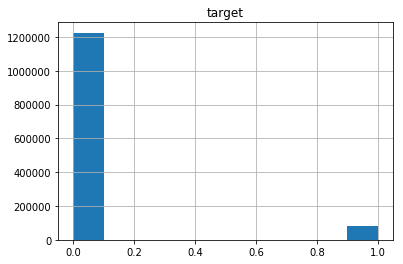

In [6]:
Quora_data.hist(bins=10)

In [7]:
Quora_data["target"].value_counts()

0    1225312
1      80810
Name: target, dtype: int64

## I-1 Data Sample and Creating a banlanced sample

In [35]:
sincireData = Quora_data[Quora_data.target==0].sample(n=Quora_data[Quora_data.target==1].shape[0],random_state=42)
sincireData.shape

(80810, 3)

In [10]:
balancedData = [sincireData,Quora_data[Quora_data.target==1]]
balancedData = pd.concat(balancedData)

balancedData.shape[0]

161620

In [36]:
balancedData = balancedData.sample(n=balancedData.shape[0])
Data = balancedData.sample(frac=0.05,random_state=10)
Data

,qid,question_text,target
1300020,fecbdf6d2c2a6148f7c4,Don't you hate it when the question says “what...,1
121300,17be8447d0d5c3e07bfa,"As a Christian restaurant owner, if the govern...",1
1088198,d540edb3c9d10bfba2b8,What is your favorite horse meat dish?,0
431146,547f9671e65e6b32595d,Are the moderate Muslims in denial about their...,1
541603,6a1e4fcb3aae8b47b524,How do I destroy the Indonesian economy?,1
679295,850a4775c7680466b649,"Will you start using the new-fangled, genderle...",1
1157465,e2cadd5ea1a867c00545,How would you arrange attractive women in asce...,1
707232,8a7a2e27e603b5da8bfc,Is present election system in India prone to c...,0
472855,5c9809982714cc1b58bc,What make it funny about old bollywood film?,1
679034,84fb2f60aec110ed2887,Why don't I like smoking pot? People try to sa...,0


In [40]:
from sklearn.model_selection import train_test_split

Xtrain,Xtest,Ytrain,Ytest = train_test_split(Data["question_text"],Data["target"],test_size=0.2,random_state=21)

(6464,)

## I-2 Tokonizing and Cleanning the data

In [21]:
#!pip install spacy
#!python -m spacy download en_core_web_sm

In [33]:
import nltk
import spacy
import en_core_web_sm
from spacy.lang.en.stop_words import STOP_WORDS
from spacy.lang.en import English
import string


In [49]:
# Loading the English Tokenizer
en_nlp = spacy.load("en_core_web_sm")
# Parser load the Parser
parser = English()
#list of Stop word
stop_word = spacy.lang.en.stop_words.STOP_WORDS
#List of Ponctuation marks
punctuations = string.punctuation

def spacy_tokenizer(question):
    tokens = parser(question)
    
    #lemmanizing each token and converting to lowercase
    tokens = [word.lemma_.lower().strip() if(word.lemma_!="-PRON-") else word.lower_ for word in tokens]
    #for word in tonkens:
    #    if(word.lemma_ != "-PRON-"):
    #        lemmawords.append(word.lemma_.lower().strip())
    #    else:
    #        lemmawords.append(word.lower_)
    #tokens = lemmawords
    
    #removing StopWord and Punctuation with a filter (on-line-code)
    tokens =[word for word in tokens if word not in stop_word and word not in punctuations  ]
    
    #list of token
    return tokens

In [50]:
from sklearn.feature_extraction.text import CountVectorizer

LemmaVetor = CountVectorizer(tokenizer=spacy_tokenizer)
LemmaVetor.fit(Xtrain)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=<function spacy_tokenizer at 0x000000002DC64158>,
        vocabulary=None)

In [56]:
print(LemmaVetor.vocabulary_)

{'christians': 1744, 'believe': 1133, 'story': 8160, 'god': 3703, 'sacrifice': 7433, 'protect': 6824, 'creation': 2206, 'hilarious': 3985, 'system': 8371, 'government': 3730, 'india': 4312, 'job': 4653, 'thirteen': 8550, 'year': 9414, 'old': 6056, 'edinburgh': 2887, 'trump': 8752, 'experience': 3178, 'future': 3553, 'usa': 8966, 'complete': 1966, 'failure': 3249, 'neumont': 5854, 'college': 1889, 'computer': 1987, 'science': 7525, 'good': 3711, 'school': 7522, 'code': 1864, 'people': 6370, 'quora': 6943, 'act': 408, 'like': 5022, 'kid': 4782, 'high': 3978, 'ego': 2910, 'liberal': 4997, 'continue': 2082, 'know': 4818, 'false': 3261, 'loud': 5109, 'wrong': 9379, 'person': 6403, 'continually': 2081, 'express': 3194, 'need': 5817, 'chaotic': 1671, 'little': 5053, 'peaceful': 6337, 'bore': 1315, 'world': 9360, 'way': 9218, 'line': 5032, 'communication': 1937, 'open': 6074, 'husband': 4124, 'marry': 5295, 'dervish': 2497, 'dance': 2333, 'rotate': 7370, 'swastika': 8335, 'big': 1184, 'bang': 